# Mismatch negativity analysis

- description
- references [...]

In [6]:
# general modules
import pynwb, os, sys
import numpy as np
import matplotlib.pylab as plt

# custom physion module
sys.path.append('..')
from physion.dataviz.show_data import MultimodalData
from datavyz import ge
# color-code
colors = {'control':'k', 'redundant':ge.red, 'deviant':ge.blue}

## MMN from LFP

### Raw data 

[204, 301, 480, 465]


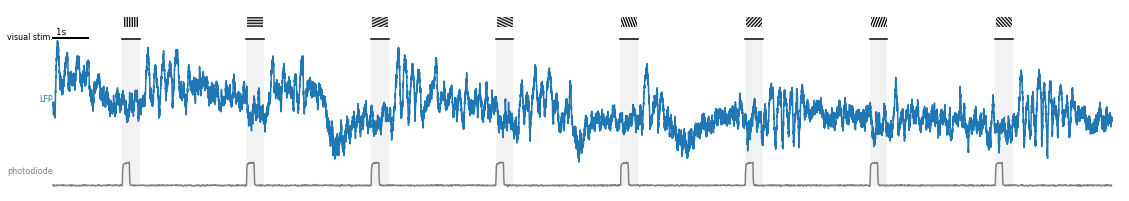

In [2]:
#filename = '/home/yann/DATA/Electrophy/2021_05_05/2021_05_05-14-26-31.nwb'
filename = '/home/yann/DATA/Habituation_June-2021/2021_06_18-16-16-37.nwb'


data = MultimodalData(filename)

plot_settings = {'settings':{'Photodiode':dict(fig_fraction=.2, subsampling=10, color='grey'),
                            'Electrophy':dict(fig_fraction=1, subsampling=10, color=plt.cm.tab10(0)),
                            'VisualStim':dict(fig_fraction=0.02, color='black', size=0.2)},'Tbar':1}

tlim = [100, 130]
fig, ax = plt.subplots(1, figsize=(15,3));plt.subplots_adjust(right=1., left=0.)
_ = data.plot_raw_data(tlim, ax=ax, **plot_settings)

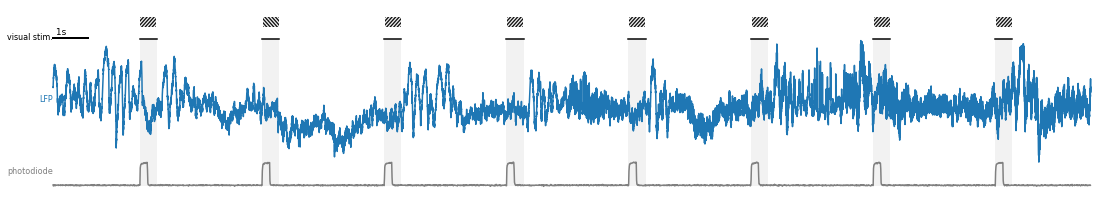

In [3]:
tlim = [700, 730]
fig, ax = plt.subplots(1, figsize=(15,3));plt.subplots_adjust(right=1., left=0.02)
_ = data.plot_raw_data(tlim, ax=ax, **plot_settings)

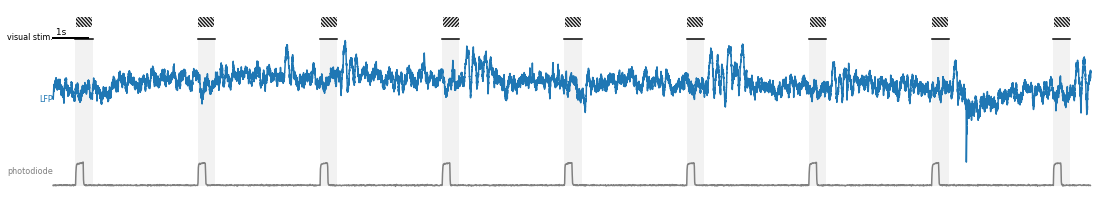

In [4]:
tlim = [1200, 1230]
fig, ax = plt.subplots(1, figsize=(15,3));plt.subplots_adjust(right=1., left=0.02)
_ = data.plot_raw_data(tlim, ax=ax, **plot_settings)

### Trial averaging

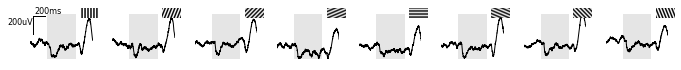

In [5]:
fig, AX = data.plot_trial_average(protocol_id=0,
                                  quantity='Electrophysiological-Signal', column_key='angle',
                                  fig_preset='raw-traces-preset',
                                  xbar=0.2, xbarlabel='200ms', ybar=0.2, ybarlabel='200uV',
                                  with_std=False, with_screen_inset=True, with_stim=True, prestim_duration=0.3)

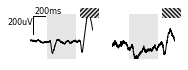

In [6]:
fig, AX = data.plot_trial_average(protocol_id=1,
                                  quantity='Electrophysiological-Signal', column_key='angle',
                                  fig_preset='raw-traces-preset',
                                  xbar=0.2, xbarlabel='200ms', ybar=0.2, ybarlabel='200uV',
                                  with_std=False, with_screen_inset=True, with_stim=True, prestim_duration=0.3)

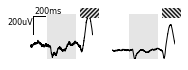

In [7]:
fig, AX = data.plot_trial_average(protocol_id=2,
                                  quantity='Electrophysiological-Signal', column_key='angle',
                                  fig_preset='raw-traces-preset',
                                  xbar=0.2, xbarlabel='200ms', ybar=0.2, ybarlabel='200uV',
                                  with_std=False, with_screen_inset=True, with_stim=True, prestim_duration=0.3)

### condition summary

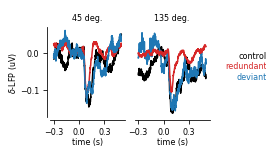

In [11]:
from physion.analysis.trial_averaging import build_episodes

fig, AX = ge.figure(axes=(2,1), figsize=(1.1,2), wspace=.2, top=.5, right=4.)

baseline_window = [-100e-3, 0] # in seconds
view_window = [-0.3, .5]

angles = [45, 135]
conditions = {'45':['control', 'redundant', 'deviant'],
              '135':['control', 'deviant', 'redundant']}
t, means = None, {'control':None, 'redundant':None, 'deviant':None}

for angle, ax in zip(angles, AX):
    means[str(angle)] = {}
    for ip, protocol, condA in zip(range(3), data.protocols, conditions[str(angle)]):
            
        EPISODES = build_episodes(data, protocol_id=ip, quantity='Electrophysiological-Signal',
                              dt_sampling=1, verbose=False)
    
 
        baseline_cond = (EPISODES['t']>baseline_window[0]) & (EPISODES['t']<baseline_window[1])
        view_cond = (EPISODES['t']>view_window[0]) & (EPISODES['t']<view_window[1])
        cond = (EPISODES['angle']==angle)
    
        baseline = np.mean(EPISODES['resp'][cond,:][:,baseline_cond])
        my = np.mean(EPISODES['resp'][cond,:]-baseline, axis=0)[view_cond]
        t = EPISODES['t'][view_cond]
        ax.plot(t, my, '-', color=colors[condA], label=condA)
                
    ge.title(ax, '%s deg.' % angle)
    
ylim = [np.min([x.get_ylim()[0] for x in AX]), np.max([x.get_ylim()[1] for x in AX])]
ge.set_plot(AX[0], xlabel='time (s)', ylabel='$\delta$-LFP (uV)', ylim=ylim)
ge.set_plot(AX[1], ['bottom'], xlabel='time (s)', ylim=ylim)

for i, k in enumerate(colors.keys()):
    ge.annotate(fig, (5+i)*'\n'+k, (1,1), ha='right', va='top', color=colors[k])

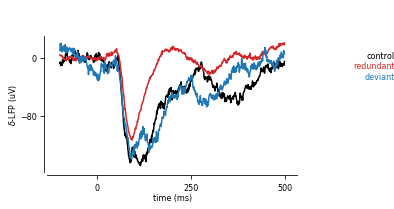

In [13]:

baseline_window = [-100e-3, 0] # in seconds
view_window = [-0.1, .5]

angles = [45, 135]
conditions = {'45':['control', 'redundant', 'deviant'],
              '135':['control', 'deviant', 'redundant']}
t, means = None, {'control':None, 'redundant':None, 'deviant':None}

for angle in angles:
    for ip, protocol, condA in zip(range(3), data.protocols, conditions[str(angle)]):
            
        EPISODES = build_episodes(data, protocol_id=ip, quantity='Electrophysiological-Signal',
                              dt_sampling=1, verbose=False)
    
        view_cond = (EPISODES['t']>view_window[0]) & (EPISODES['t']<view_window[1])
        t = EPISODES['t'][view_cond]
        baseline_cond = (EPISODES['t']>baseline_window[0]) & (EPISODES['t']<baseline_window[1])
        cond = (EPISODES['angle']==angle)
        
        if means[condA] is None:
            means[condA] = 0*t
                
        baseline = np.mean(EPISODES['resp'][cond,:][:,baseline_cond])
        means[condA] += np.mean(EPISODES['resp'][cond,:]-baseline, axis=0)[view_cond]/len(angles)        
        
fig, ax = ge.figure(figsize=(2,3), wspace=.2, top=.5, right=4.)
for cond in means:
    ax.plot(1e3*t, 1e3*means[cond], '-', color=colors[cond])
                
for i, k in enumerate(colors.keys()):
    ge.annotate(fig, (5+i)*'\n'+k, (1,1), ha='right', va='top', color=colors[k])
    
ge.set_plot(ax, xlabel='time (ms)', ylabel='$\delta$-LFP (uV)')

## MMN from Calcium Imaging

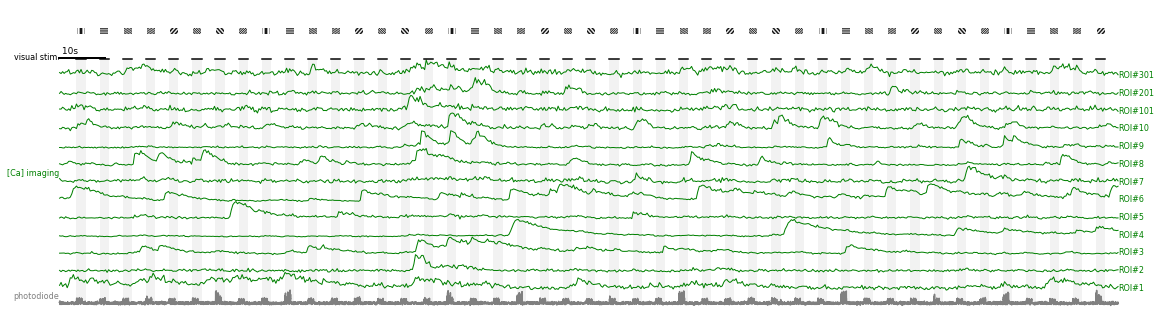

In [7]:
# general modules
import pynwb, os, sys
import numpy as np
import matplotlib.pylab as plt

# custom physion module
sys.path.append('..')
from physion.dataviz.show_data import MultimodalData

filename = '/home/yann/DATA/CaImaging/Wild_Type_GCamp6s/2021_05_18/2021_05_18-14-04-59.nwb'
filename = '/home/yann/DATA/CaImaging/Wild_Type_GCamp6s/2021_04_30/2021_04_30-11-17-10.nwb'

data = MultimodalData(filename)

plot_settings = {'settings':{'Photodiode':dict(fig_fraction=.2, subsampling=10),
                             'CaImaging':dict(fig_fraction=3, subsampling=10, 
                                              roiIndices=list(range(10))+[100,200, 300]),
                             'VisualStim':dict(fig_fraction=0.02, size=0.2)},'Tbar':10}

tlim = [100, 330]
fig, ax = plt.subplots(1, figsize=(15,5));plt.subplots_adjust(right=1., left=0.)
_ = data.plot_raw_data(tlim, ax=ax, **plot_settings)

In [3]:
# find angles used for MMN
for ip, protocol in enumerate(data.protocols):
    cond_protocol = (data.nwbfile.stimulus['protocol_id'].data[:]==ip)
    angles = np.unique(data.nwbfile.stimulus['angle'].data[cond_protocol])
    print('for protocol #%i: "%s", angles' % (ip+1, protocol), angles)
    print('with hist:', np.histogram(data.nwbfile.stimulus['angle'].data[cond_protocol], bins=9)[0])

for protocol #1: "many-standards", angles [  0.   22.5  45.   67.5  90.  112.5 135.  157.5]
with hist: [20 20 20 20  0 20 20 20 20]
for protocol #2: "oddball-1", angles [ 45. 135.]
with hist: [140   0   0   0   0   0   0   0  20]
for protocol #3: "oddball-2", angles [ 45. 135.]
with hist: [ 20   0   0   0   0   0   0   0 140]


In [3]:
# looking for significant evoked response in "many-standard protocol"
from physion.analysis.stat_tools import CellResponse
angles = [45, 135]
ROIS = {}
for angle in angles:
    ROIS[str(angle)] = []
    for roi in range(np.sum(data.iscell)):
        cell = CellResponse(data, protocol_id=0, roiIndex=roi, quantity='CaImaging', subquantity='dF/F')
        output = cell.compute_responsiveness(interval_pre=[-1,0],
                                         interval_post=[0,1])
        # responsiveness criterion
        if np.array(output['responsive'])[np.array(output['angle'])==float(angle)]:
            ROIS[str(angle)].append(roi)
print('ROIS having a significant evoked response: ', ROIS)

ROIS having a significant evoked response:  {'45': [6, 19, 20, 23, 29, 30, 31, 32, 46, 47, 49, 55, 56, 62, 64, 68, 72, 76, 77, 83, 86, 89, 92, 98, 99, 101, 105, 108, 114, 116, 117, 120, 123, 126, 127, 128, 130, 133, 138, 146, 147, 149, 150, 154, 155, 156, 158, 161, 163, 165, 166, 172, 176, 178, 179, 180, 181, 190, 196, 199, 203, 208, 211, 213, 214, 216, 219, 222, 223, 224, 225, 226, 227, 229, 230, 232, 233, 238, 240, 241, 242, 244, 245, 246, 247, 250, 254, 256, 258, 259, 261, 263, 267, 268, 270, 272, 273, 274, 278, 280, 281, 282, 283, 286, 287, 289, 291, 293, 294, 297, 299, 302, 304, 307, 308, 310, 311, 316, 322], '135': [20, 32, 46, 49, 50, 55, 56, 57, 67, 83, 101, 102, 108, 120, 130, 135, 147, 149, 156, 163, 167, 176, 179, 195, 196, 199, 200, 216, 223, 224, 238, 241, 247, 254, 258, 260, 266, 267, 268, 270, 284, 291, 293, 296, 311, 315]}


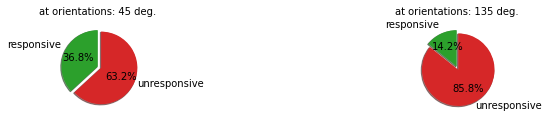

In [4]:
from datavyz import ge
fig, AX = ge.figure(axes=(2,1), figsize=(2,2), wspace=1.)
for ax, angle in zip(AX, angles):
    ax.pie([100*len(ROIS[str(angle)])/np.sum(data.iscell),
            100*(1-len(ROIS[str(angle)])/np.sum(data.iscell))], explode=(0, 0.1), colors=[ge.green, ge.red],
            labels=['responsive\n', 'unresponsive'], autopct='%1.1f%%', shadow=True, startangle=90)
    ax.axis('off')
    ax.set_title('at orientations: %.0f deg.' % angle, size=10);

In [8]:
ROIS = {'45': [20, 23, 31, 32, 47, 55, 56, 64, 68, 76, 77, 83, 86, 89, 92, 98, 105, 108, 114, 116, 117, 120, 123, 128, 133, 138, 146, 147, 150, 154, 156, 161, 163, 166, 172, 176, 179, 180, 181, 190, 196, 199, 214, 216, 223, 224, 226, 227, 229, 230, 233, 238, 240, 241, 242, 244, 250, 254, 256, 258, 263, 267, 268, 270, 272, 273, 278, 280, 281, 282, 283, 286, 287, 293, 294, 297, 299, 302, 307, 310, 311, 316], '135': [20, 32, 46, 50, 55, 56, 57, 67, 83, 101, 102, 108, 130, 135, 147, 149, 156, 163, 167, 176, 196, 199, 200, 216, 223, 224, 238, 241, 247, 254, 260, 266, 267, 268, 270, 291, 296, 311, 315]}

In [ ]:
for roi in [ROIS['45'][0], ROIS['135'][0]]:
    #condition = 
    fig, AX = data.plot_trial_average(protocol_id=0,
                        quantity='CaImaging', subquantity='dF/F', roiIndex=roi,
                        column_key='angle',
                        fig_preset='raw-traces-preset',
                        xbar=1, xbarlabel='1s', ybar=1, ybarlabel='1dF/F',
                        with_std=True,
                        with_screen_inset=True,
                        with_stim=True, prestim_duration=2)
    ge.annotate(fig, 'roi #%i' % roi, (1,0), ha='right')

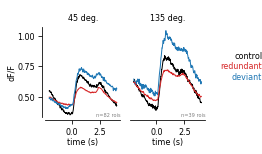

In [10]:
from physion.analysis.stat_tools import CellResponse

fig, AX = ge.figure(axes=(2,1), figsize=(1.1,2), wspace=.2, top=.5, right=4.)

conditions = {'45':['control', 'redundant', 'deviant'],
              '135':['control', 'deviant', 'redundant']}
means = {}

for angle, ax in zip([45, 135], AX):
    means[str(angle)] = {}
    for ip, protocol, cond in zip(range(3), data.protocols, conditions[str(angle)]):
        means[str(angle)][cond] = []
        for roi in ROIS[str(angle)]:
            cell = CellResponse(data, protocol_id=ip, prestim_duration=2, 
                            roiIndex=roi, quantity='CaImaging', subquantity='dF/F')

            condition = np.array(data.nwbfile.stimulus['angle'].data[:]==angle)[data.Pcond]
            means[str(angle)][cond].append(cell.get_average(condition))
    
        ge.plot(cell.EPISODES['t'], np.array(means[str(angle)][cond]).mean(axis=0), 
                #sy=np.array(means[str(angle)]).std(axis=0), 
                color=colors[cond], no_set=True, ax=ax)
        
    ge.title(ax, '%s deg.' % angle)
    ge.annotate(ax, 'n=%i rois' % len(ROIS[str(angle)]),
                (1,0), va='bottom', ha='right', size='xx-small', color='grey')
    
ylim = [np.min([x.get_ylim()[0] for x in AX]), np.max([x.get_ylim()[1] for x in AX])]
ge.set_plot(AX[0], xlabel='time (s)', ylabel='dF/F', ylim=ylim)
ge.set_plot(AX[1], ['bottom'], xlabel='time (s)', ylim=ylim)

for i, k in enumerate(colors.keys()):
    ge.annotate(fig, (5+i)*'\n'+k, (1,1), ha='right', va='top', color=colors[k])
    
means['t'] = cell.EPISODES['t'] # need to store the time axis

KeyError: '45.0'

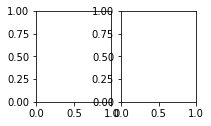

In [11]:
pre_interval, post_interval = [-1,0], [1,2]

fig, AX = ge.figure(axes=(2,1), figsize=(1.1,2), wspace=.2, top=.5, right=4.)

evoked, evokedT = {}, {}
for angle, ax in zip(angles, AX):
    evoked[str(angle)], evokedT[str(angle)] = {}, {}
    for ip, protocol, cond in zip(range(3), data.protocols, conditions[str(angle)]):
        evoked[str(angle)][cond], evokedT[str(angle)][cond] = [], []
        for ir, roi in enumerate(ROIS[str(angle)]):
            dFoF = means[str(angle)][cond][ir]
            pre_cond = (means['t']>pre_interval[0]) & (means['t']<=pre_interval[1])
            post_cond = (means['t']>post_interval[0]) & (means['t']<=post_interval[1])
            evokedT[str(angle)][cond].append(dFoF-dFoF[pre_cond].mean())
    
        ge.plot(cell.EPISODES['t'], np.array(evokedT[str(angle)][cond]).mean(axis=0), 
                #sy=np.array(means[str(angle)]).std(axis=0), 
                color=colors[cond], no_set=True, ax=ax)
        
    ge.title(ax, '%s deg.' % angle)
    ge.annotate(ax, 'n=%i rois' % len(ROIS[str(angle)]),
                (1,0), va='bottom', ha='right', size='xx-small', color='grey')
    
ylim = [np.min([x.get_ylim()[0] for x in AX]), np.max([x.get_ylim()[1] for x in AX])]
ge.set_plot(AX[0], xlabel='time (s)', ylabel='$\Delta$ dF/F', ylim=ylim)
ge.set_plot(AX[1], ['bottom'], xlabel='time (s)', ylim=ylim)

for i, k in enumerate(colors.keys()):
    ge.annotate(fig, (5+i)*'\n'+k, (1,1), ha='right', va='top', color=colors[k])

In [ ]:
pre_interval, post_interval = [-1,0], [1,2]

fig, ax = ge.figure(figsize=(2,3), top=.5, right=4.)

nroi =0
evoked = {'control':0*means['t'], 'redundant':0*means['t'], 'deviant':0*means['t']}
for angle in angles:
    for ip, protocol, cond in zip(range(3), data.protocols, conditions[str(angle)]):
        evoked[cond] += np.array(evokedT[str(angle)][cond]).mean(axis=0)/len(ROIS[str(angle)])
        nroi += len(ROIS[str(angle)])
        

for ip, protocol, cond in zip(range(3), data.protocols, conditions[str(angle)]):
    evoked[cond] = nroi*evoked[cond] # need to re-weight trials
    ge.plot(cell.EPISODES['t'], evoked[cond], 
                #sy=np.array(means[str(angle)]).std(axis=0), 
                color=colors[cond], no_set=True, ax=ax)

ge.annotate(ax, 'n=%i rois' % nroi, (1,0), va='bottom', ha='right', size='xx-small', color='grey')
    
#ylim = [np.min([x.get_ylim()[0] for x in AX]), np.max([x.get_ylim()[1] for x in AX])]
ge.set_plot(ax, xlabel='time (s)', ylabel='$\Delta$ dF/F')
ax.fill_between([0,2], ax.get_ylim()[0]*np.ones(2), ax.get_ylim()[1]*np.ones(2), color='gray', alpha=.2, lw=0)

for i, k in enumerate(colors.keys()):
    ge.annotate(fig, (5+i)*'\n'+k, (1,1), ha='right', va='top', color=colors[k])